### Choosing best Model and Saving


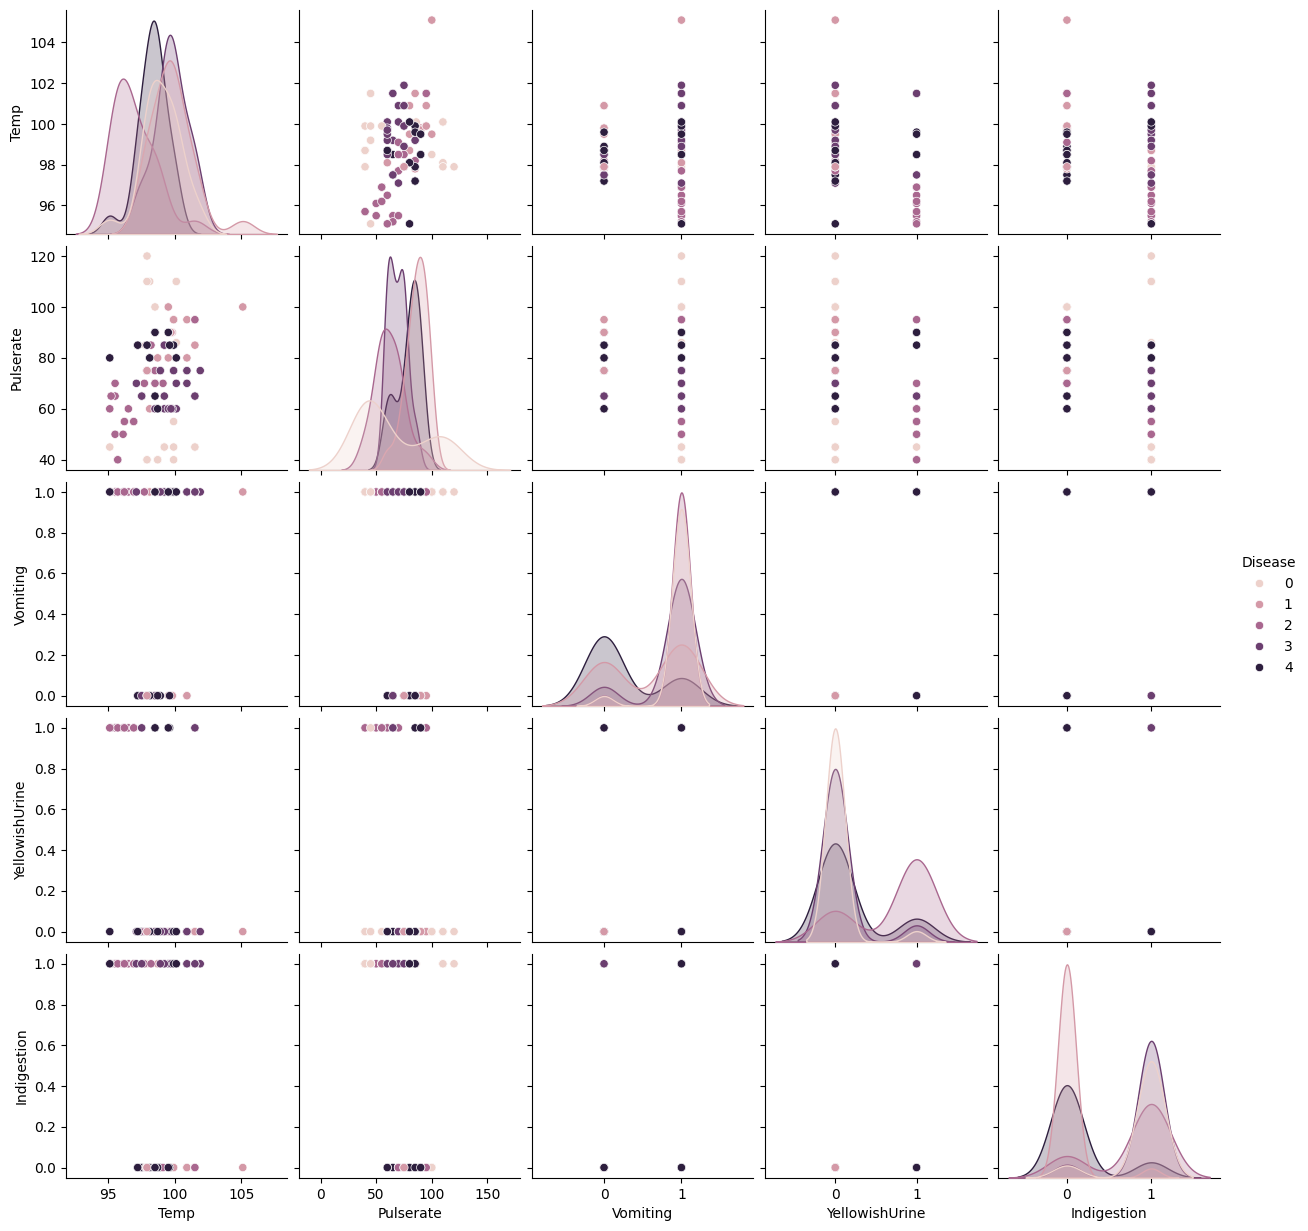

Model: Random Forest
Accuracy: 0.6522
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      0.57      0.67         7
           2       0.00      0.00      0.00         2
           3       0.60      0.75      0.67         4
           4       0.50      0.75      0.60         4

    accuracy                           0.65        23
   macro avg       0.58      0.58      0.57        23
weighted avg       0.70      0.65      0.66        23

Confusion Matrix:
[[5 0 1 0 0]
 [0 4 1 0 2]
 [0 1 0 1 0]
 [0 0 0 3 1]
 [0 0 0 1 3]]
--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.6522
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      0.57      0.67         7
           2       0.00      0.00      0.00         2
           3       0.75      0.75

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(filepath):
    dataset = pd.read_csv(filepath)
    X = dataset.drop('Disease', axis=1)
    y = dataset['Disease']
    return X, y

def visualize_data(dataset):
    sns.pairplot(dataset, hue='Disease')
    plt.show()

def preprocess_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    best_model = None
    best_accuracy = 0
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((name, accuracy))
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 50)

        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy

    return best_model, best_accuracy, results

def save_model(model, scaler, filename_model="best_model.pkl", filename_scaler="scaler.pkl"):
    joblib.dump(model, filename_model)
    joblib.dump(scaler, filename_scaler)
    print(f"Best model saved as {filename_model}")
    print(f"Scaler saved as {filename_scaler}")

def predict_disease(model, scaler):
    print("Enter the following information:")
    temp_f = float(input("Temperature (F): "))
    pulse_rate_bpm = float(input("Pulse rate (bpm): "))
    vomiting = int(input("Vomiting (0 or 1): "))
    yellowish_urine = int(input("Yellowish Urine (0 or 1): "))
    indigestion = int(input("Indigestion (0 or 1): "))

    user_input = pd.DataFrame({
        'Temp': [temp_f],
        'Pulserate': [pulse_rate_bpm],
        'Vomiting': [vomiting],
        'YellowishUrine': [yellowish_urine],
        'Indigestion': [indigestion]
    })

    user_input_scaled = scaler.transform(user_input)

    predicted_disease = model.predict(user_input_scaled)[0]
    print(f"Predicted Disease: {predicted_disease}")

if __name__ == "__main__":
    filepath = "datasets/general.csv"
    X, y = load_data(filepath)

    visualize_data(pd.read_csv(filepath))

    X_scaled, scaler = preprocess_data(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    best_model, best_accuracy, results = evaluate_models(X_train, X_test, y_train, y_test)
    print("Summary of model performance:")
    for name, accuracy in results:
        print(f"{name}: {accuracy:.4f}")

    print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.4f}")

    save_model(best_model, scaler)

    predict_disease(best_model, scaler)


In [4]:
import pandas as pd
import joblib

model = joblib.load("savedmodels/generalmodel/best_model.pkl")
scaler = joblib.load("savedmodels/generalmodel/scaler.pkl")

def predict_disease_with_saved_model():
    print("Enter the following information:")
    temp_f = float(input("Temperature (F): "))
    pulse_rate_bpm = float(input("Pulse rate (bpm): "))
    vomiting = int(input("Vomiting (0 or 1): "))
    yellowish_urine = int(input("Yellowish Urine (0 or 1): "))
    indigestion = int(input("Indigestion (0 or 1): "))

    user_input = pd.DataFrame({
        'Temp': [temp_f],
        'Pulserate': [pulse_rate_bpm],
        'Vomiting': [vomiting],
        'YellowishUrine': [yellowish_urine],
        'Indigestion': [indigestion]
    })

    user_input_scaled = scaler.transform(user_input)

    predicted_disease = model.predict(user_input_scaled)[0]
    print(f"Predicted Disease: {predicted_disease}")

predict_disease_with_saved_model()


Enter the following information:
Predicted Disease: 3
